## ETAPA 0 - CARREGAMENTO DAS BIBLIOTECAS

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import patsy as pt
from google.colab import drive
from sklearn import metrics
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge

## 1 - CARREGAMENTO, EDA E PRÉ-PROCESSAMENTO

### 1.1 Carregamento


In [10]:

startups = 'https://raw.githubusercontent.com/andreinaabrantes/Startups-Regress-o-/main/50_Startups.csv'
df = pd.read_csv(startups, sep = ',')
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### 1.2 EDA 


#### Histogramas


Text(0, 0.5, 'Frequencia')

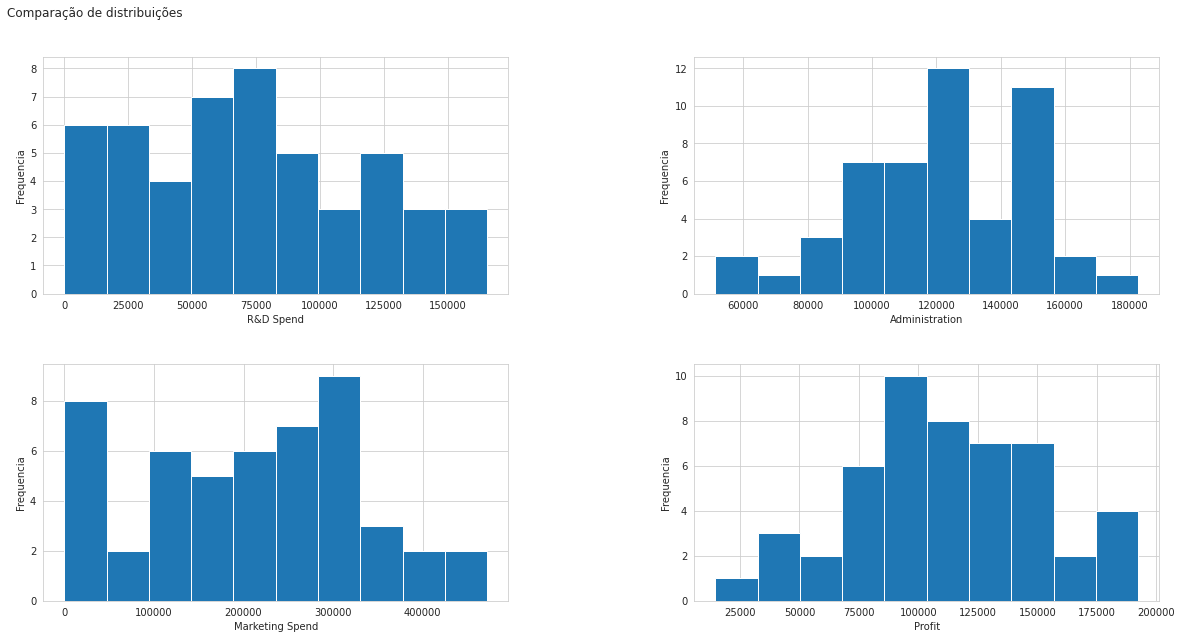

In [11]:
#criação da figura e dos subplots 
fig = plt.figure(figsize= (20,10))
plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
fig.suptitle('Comparação de distribuições', x=0.1, y=.95, horizontalalignment = 'left', verticalalignment = 'top')
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#criação dos gráficos de histograma e acerta os nomes dos eixos
ax1.hist(df['R&D Spend'])
ax1.set_xlabel('R&D Spend')
ax1.set_ylabel('Frequencia')

ax2.hist(df['Administration'])
ax2.set_xlabel('Administration')
ax2.set_ylabel('Frequencia')

ax3.hist(df['Marketing Spend'])
ax3.set_xlabel('Marketing Spend')
ax3.set_ylabel('Frequencia')

ax4.hist(df['Profit'])
ax4.set_xlabel('Profit')
ax4.set_ylabel('Frequencia')



#### Distribuição dos estados 

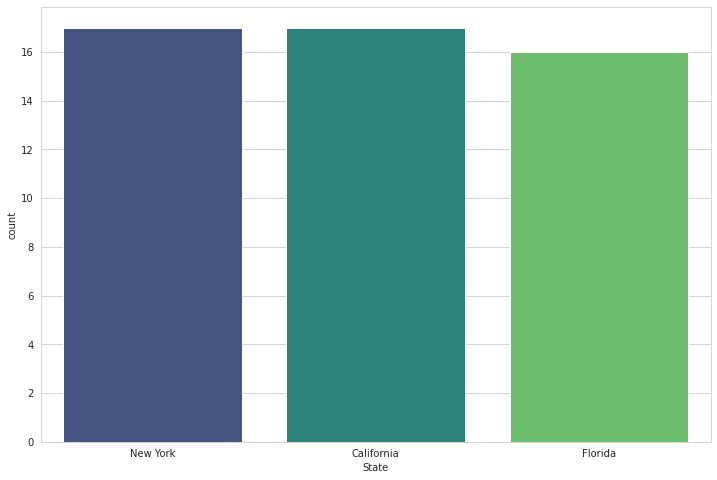

In [12]:
# de maneira rapida e simples
plt.figure(figsize= (12,8))
sns.countplot(data=df, x='State', palette='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


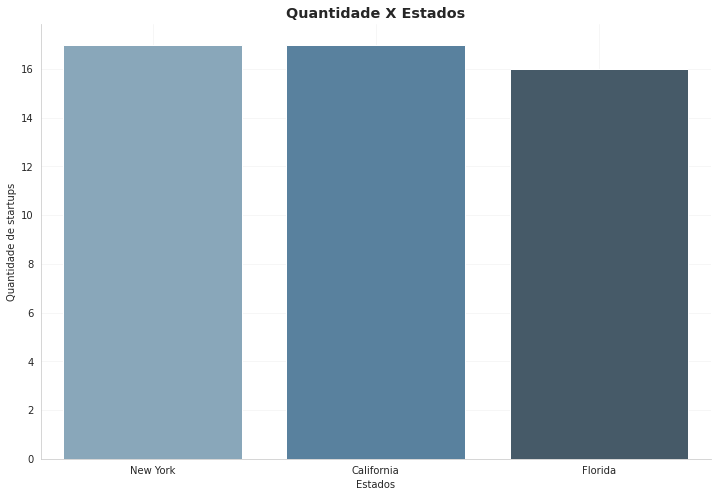

In [13]:
#definindo eixos do grafico de barras 
x = df['State'].value_counts().index
y = df['State'].value_counts()

plt.figure(figsize=(12,8))
plt.title('Quantidade X Estados', weight='bold', size='x-large')
sns.barplot(x,y, saturation=0.5, palette='Blues_d')
plt.ylabel('Quantidade de startups')
plt.xlabel('Estados')
plt.grid(True, alpha=.2)
sns.despine()
plt.show()


#### Correlação 


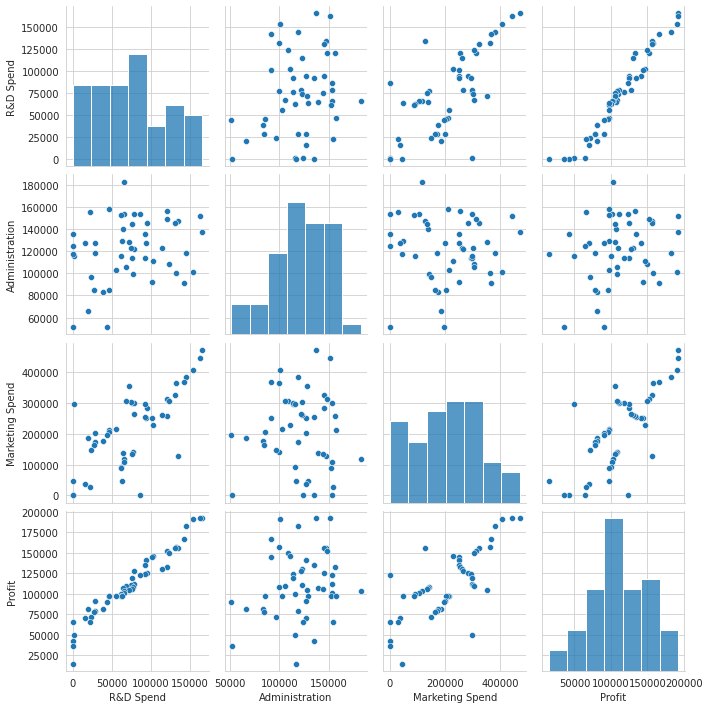

In [14]:
#correlação entre todas as variáveis
sns.pairplot(df)

In [15]:
corrMatPd = df.corr()
corrMatPd

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#### Boxplot - Profit X State

In [16]:
plt.close('all')

Text(0, 0.5, 'Profit')

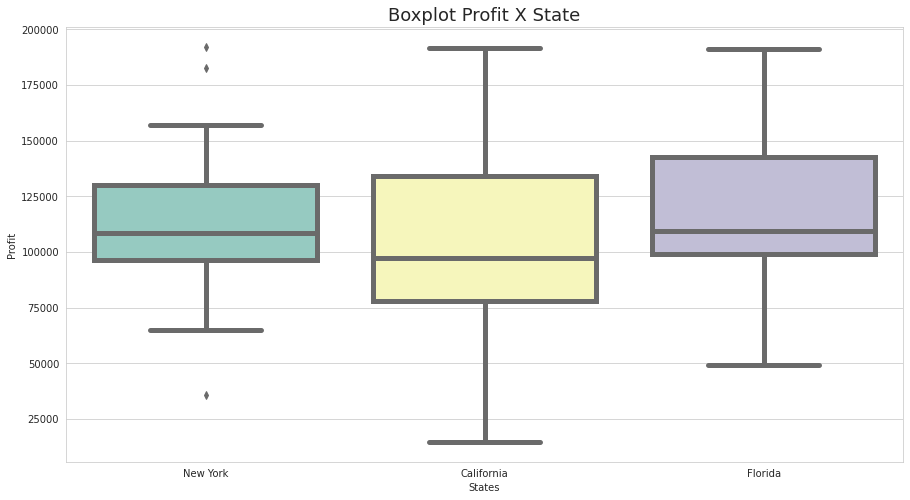

In [17]:
fig = plt.figure(figsize=(15,8))
# plt.boxplot([df['Profit'], df['State']], showmeans = True)
# plt.ylabel('Profit')

# x = df['State'].value_counts().index

sns.set_style('whitegrid')
ax = sns.boxplot(x = 'State', y ='Profit', data=df, linewidth=5, palette = "Set3")

plt.title("Boxplot Profit X State", loc="center", fontsize=18)
plt.xlabel("States")
plt.ylabel("Profit")




### 1.3 Pré-Processamento 


#### 1.3.1 Separarando variáveis 

In [18]:
# variável resposta = df['Profit']
# varáveis continuas = df['R&D Spend'], df['Administration'], df[Marketing Spend']
# variável discreta = df['State']

##### Variáveis continuas 

In [19]:
dfNum = df.select_dtypes(include = 'number').drop(columns = ['Profit'])
dfNum.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


##### Variáveis Categóricas 

In [20]:

# dfCat = df.select_dtypes(include = 'category')
# usando o include "category" a fução não reconheceu 

# alterado para category 
df['State'] = df['State'].astype('category')

dfCat = df.select_dtypes(include = 'category')
dfCat.head()

,State
0,New York
1,California
2,Florida
3,New York
4,Florida


##### Variável resposta 

In [21]:
y = df['Profit'].to_frame()
y


,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


#### 1.3.2 Pré-tratamento da resposta 

In [22]:
kStat, kPvaule = sp.stats.kstest(rvs=y, cdf='norm')
print("kStat:",kStat,'kPvaule:',kPvaule)

kStat: 1.0 kPvaule: 0.0


##### Teste log da resposta

In [23]:
kStat, kPvaule = sp.stats.kstest(rvs=np.log(y), cdf='norm')
print("kStat:",kStat,'kPvaule:',kPvaule)


kStat: 1.0 kPvaule: 0.0


In [ ]:
fig = plt.figure()
plt.hist(np.log(y))

#### 1.3.3 Pré-tratamento das variáveis contínuas - Escalonamento

In [27]:
# Criar a função para escalonamento dos dados 
def feat_scale(X):

  # calcular a média de todas as variáveis 
  mu = np.mean(X, axis = 0)

  # Calcular o desvio padrão de todas a variáveis
  sigma = np.std(X, axis = 0, ddof = 1)

  #fazer o escalonamento das variáveis 
  xNorm = (X - mu)/ sigma  

  return xNorm 



In [31]:
dfNorm = feat_scale(dfNum)
dfNorm.head()

,R&D Spend,Administration,Marketing Spend
0,1.996146,0.555117,2.132295
1,1.936203,1.071924,1.904267
2,1.736731,-0.720938,1.610180
3,1.539157,-0.095396,1.407916
4,1.489812,-1.069066,1.268648


#### 1.3.4 Pré-tratamento das variáveis categorias 

In [33]:
dfDum = pd.get_dummies(dfCat)
dfDum.head()

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [38]:
dfFinal = pd.concat([dfNorm.reset_index(drop = True), dfDum], axis= 1)
dfFinal.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,1.996146,0.555117,2.132295,0,0,1
1,1.936203,1.071924,1.904267,1,0,0
2,1.736731,-0.720938,1.610180,0,1,0
3,1.539157,-0.095396,1.407916,0,0,1
4,1.489812,-1.069066,1.268648,0,1,0


## 2 - AJUSTE DO MODELO (MÉTODO DOS MÍNIMOS QUADRADOS)


## 3 - AJUSTE DO MODELO (MÉTODO DO GRADIENTE DESCENDENTE)

## 4 - SIGNIFICÂNCIA ESTATÍSTICA

## 5 - QUALIDADE DO AJUSTE

## 6 - ANÁLISE DO RESÍDUO

## 7 - REGRESSÃO REGULARIZADA